In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from brian2.units import *

In [28]:
hardcoded_t_record = None

In [29]:
def load_data(evo_filename, analysis_filename, original_filename):
    global hardcoded_t_record
    
    data = np.load(evo_filename)
    sigmas = data['all_mean_sigmas']
    ads = data['all_mean_ads']
    
    analysis_data = np.load(analysis_filename)
    init_mean_std = analysis_data['init_mean_std']
    init_mean_ad  = analysis_data['init_mean_AD']
    
    original_data = np.load(original_filename)
    simdata = np.array(original_data['sim_params']).ravel()[0]
    
    if hardcoded_t_record is None:
        hardcoded_t_record = simdata['t_record'] * ms
        
        
    # close data files    
    data.close()
    analysis_data.close()
    original_data.close()
    
    # return all the useful data
    return sigmas, ads, init_mean_std, init_mean_ad

In [56]:
all_mean_sigmas_lesioned, all_mean_ads_lesioned, init_mean_std_lesioned, init_mean_AD_lesioned = \
    load_data("last_std_ad_evo_lesion_600k.npz", 
              "analysis_lesion_600k.npz", 
              "case_1_lesion_600k.npz")
    
all_mean_sigmas_non_lesioned, all_mean_ads_non_lesioned, init_mean_std_non_lesioned, init_mean_AD_non_lesioned = \
    load_data("last_std_ad_evo_non_lesioned_600k.npz", 
              "analysis_non_lesioned_600k.npz", 
              "case_1_non_lesioned_600k.npz")    

all_mean_sigmas_lesioned_13_bias, all_mean_ads_lesioned_13_bias, init_mean_std_lesioned_13_bias, init_mean_AD_lesioned_13_bias = \
    load_data("case_1_lesioned_w_13_bias_600k/last_std_ad_evo_13_bias_600k.npz", 
              "case_1_lesioned_w_13_bias_600k/analysis_13_bias_600k.npz", 
              "case_1_lesioned_w_13_bias_600k/case_1_lesioned_w_13_bias_600k.npz")   

    
all_mean_sigmas_lesioned_13_bias, all_mean_ads_lesioned_13_bias, init_mean_std_lesioned_13_bias, init_mean_AD_lesioned_13_bias = \
    load_data("case_1_lesioned_w_13_bias_600k/last_std_ad_evo_13_bias_600k.npz", 
              "case_1_lesioned_w_13_bias_600k/analysis_13_bias_600k.npz", 
              "case_1_lesioned_w_13_bias_600k/case_1_lesioned_w_13_bias_600k.npz")   
    

all_mean_sigmas_case_3, all_mean_ads_case_3, init_mean_std_case_3, init_mean_AD_case_3 = \
    load_data("case_3_600k/last_std_ad_evo_case_3_600k.npz", 
              "case_3_600k/analysis_case_3_600k.npz", 
              "case_3_600k/case_3_600k.npz")  
    
all_mean_sigmas_5_percent, all_mean_ads_5_percent, init_mean_std_5_percent, init_mean_AD_5_percent = \
    load_data("case_1_5_percent_600k/last_std_ad_evo_5_percent.npz", 
              "case_1_5_percent_600k/analysis_5_percent.npz", 
              "case_1_5_percent_600k/case_1_5_percent_600k.npz") 

all_mean_sigmas_case_1_gaussian_input, all_mean_ads_case_1_gaussian_input,\
init_mean_std_case_1_gaussian_input, init_mean_AD_case_1_gaussian_input = \
    load_data("case_1_gaussian_input_600k/last_std_ad_evo_gaussian_input.npz", 
              "case_1_gaussian_input_600k/analysis_gaussian_input.npz", 
              "case_1_gaussian_input_600k/case_1_gaussian_input_600k.npz")     
    
    
all_mean_sigmas_case_3_lesioned_gaussian_input, all_mean_ads_case_3_lesioned_gaussian_input,\
init_mean_std_case_3_lesioned_gaussian_input, init_mean_AD_case_3_lesioned_gaussian_input = \
    load_data("case_3_gaussian_input_lesioned_600k/last_std_ad_evo.npz", 
              "case_3_gaussian_input_lesioned_600k/analysis_144928_14122017.npz", 
              "case_3_gaussian_input_lesioned_600k/case_3_gaussian_input_lesioned_600k.npz")  
    
all_mean_sigmas_case_1_lesioned_gaussian_input, all_mean_ads_case_1_lesioned_gaussian_input,\
init_mean_std_case_1_lesioned_gaussian_input, init_mean_AD_case_1_lesioned_gaussian_input = \
    load_data("case_1_gaussian_input_lesioned_600k/last_std_ad_evo.npz", 
              "case_1_gaussian_input_lesioned_600k/analysis_145921_14122017.npz", 
              "case_1_gaussian_input_lesioned_600k/case_1_gaussian_input_lesioned_600k.npz")     
    

In [57]:
hardcoded_t_record.dimensions

second

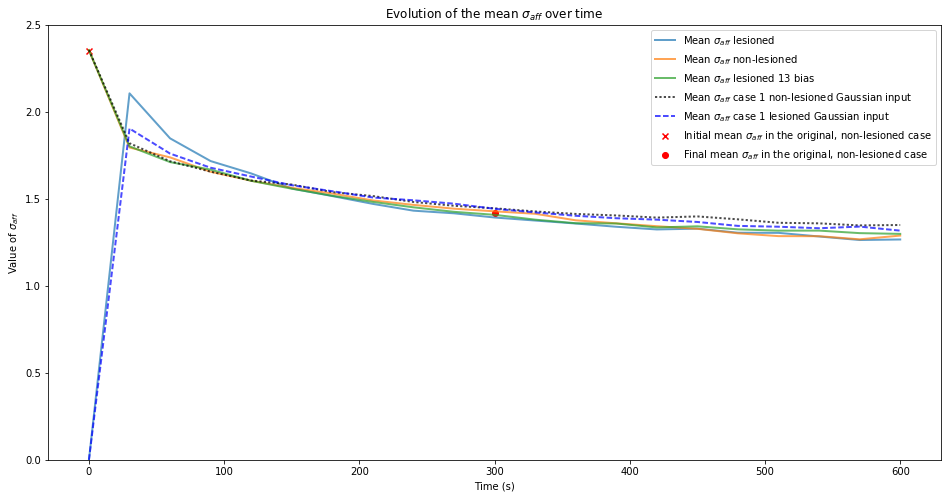

In [64]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
conc_lesioned = np.concatenate(([init_mean_std_lesioned],all_mean_sigmas_lesioned))
conc_lesioned_13_bias = np.concatenate(([init_mean_std_lesioned_13_bias],all_mean_sigmas_lesioned_13_bias))
conc_non_lesioned = np.concatenate(([init_mean_std_non_lesioned],all_mean_sigmas_non_lesioned))
conc_case_3 = np.concatenate(([init_mean_std_case_3_lesioned_gaussian_input],all_mean_sigmas_case_3_lesioned_gaussian_input))
conc_case_1_gaussian_input = np.concatenate(([init_mean_std_case_1_gaussian_input],all_mean_sigmas_case_1_gaussian_input))
conc_case_1_gaussian_input_lesioned = np.concatenate(([init_mean_std_case_1_lesioned_gaussian_input],all_mean_sigmas_case_1_lesioned_gaussian_input))


i = ax1.plot(np.arange(all_mean_sigmas_lesioned.size+1) * hardcoded_t_record, conc_lesioned, label='Mean $\sigma_{aff}$ lesioned', alpha=.7, linewidth=2)
ax1.plot(np.arange(all_mean_sigmas_non_lesioned.size+1) * hardcoded_t_record, conc_non_lesioned, label='Mean $\sigma_{aff}$ non-lesioned', alpha=.7, linewidth=2)
ax1.plot(np.arange(all_mean_sigmas_lesioned_13_bias.size+1) * hardcoded_t_record, conc_lesioned_13_bias, label='Mean $\sigma_{aff}$ lesioned 13 bias', alpha=.7, linewidth=2)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 non-lesioned Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )



ax1.grid(visible=False)
ax1.set_title("Evolution of the mean $\sigma_{aff}$ over time")
ax1.set_ylim([0, np.max(conc_lesioned) + 0.2])
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylabel("Value of $\sigma_{aff}$")

ax1.scatter(0, 2.35, marker='x', c='r', label="Initial mean $\sigma_{aff}$ in the original, non-lesioned case")
ax1.scatter(all_mean_sigmas_lesioned.size* hardcoded_t_record//2, 1.42, c='r', label="Final mean $\sigma_{aff}$ in the original, non-lesioned case")
ax1.set_ylim([0, 2.5])


ax1.legend(loc='best')
plt.savefig("mean_std_evo_lesioned_vs_non_lesioned.png")

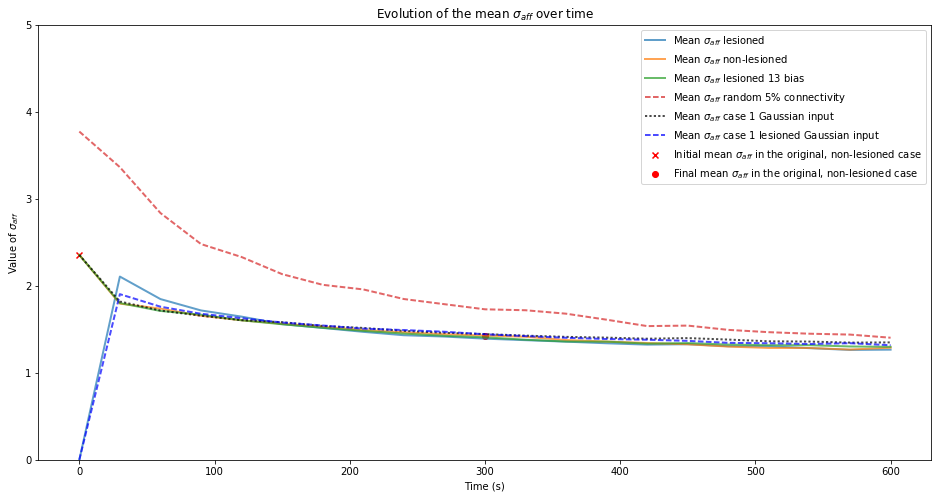

In [65]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
conc_lesioned = np.concatenate(([init_mean_std_lesioned],all_mean_sigmas_lesioned))
conc_lesioned_13_bias = np.concatenate(([init_mean_std_lesioned_13_bias],all_mean_sigmas_lesioned_13_bias))
conc_non_lesioned = np.concatenate(([init_mean_std_non_lesioned],all_mean_sigmas_non_lesioned))
conc_case_3 = np.concatenate(([init_mean_std_case_3_lesioned_gaussian_input],all_mean_sigmas_case_3_lesioned_gaussian_input))
conc_case_5_percent = np.concatenate(([init_mean_std_5_percent],all_mean_sigmas_5_percent))
conc_case_1_gaussian_input = np.concatenate(([init_mean_std_case_1_gaussian_input],all_mean_sigmas_case_1_gaussian_input))
conc_case_1_gaussian_input_lesioned = np.concatenate(([init_mean_std_case_1_lesioned_gaussian_input],all_mean_sigmas_case_1_lesioned_gaussian_input))


i = ax1.plot(np.arange(all_mean_sigmas_lesioned.size+1) * hardcoded_t_record, conc_lesioned, label='Mean $\sigma_{aff}$ lesioned', alpha=.7, linewidth=2)
ax1.plot(np.arange(all_mean_sigmas_non_lesioned.size+1) * hardcoded_t_record, conc_non_lesioned, label='Mean $\sigma_{aff}$ non-lesioned', alpha=.7, linewidth=2)
ax1.plot(np.arange(all_mean_sigmas_lesioned_13_bias.size+1) * hardcoded_t_record, conc_lesioned_13_bias, label='Mean $\sigma_{aff}$ lesioned 13 bias', alpha=.7, linewidth=2)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
ax1.plot(np.arange(all_mean_sigmas_5_percent.size+1) * hardcoded_t_record, conc_case_5_percent, label='Mean $\sigma_{aff}$ random 5% connectivity', alpha=.7, linewidth=2, ls='--')
ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )



ax1.grid(visible=False)
ax1.set_title("Evolution of the mean $\sigma_{aff}$ over time")
ax1.set_ylim([0, np.max(conc_lesioned) + 0.2])
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylabel("Value of $\sigma_{aff}$")

ax1.scatter(0, 2.35, marker='x', c='r', label="Initial mean $\sigma_{aff}$ in the original, non-lesioned case")
ax1.scatter(all_mean_sigmas_lesioned.size* hardcoded_t_record//2, 1.42, c='r', label="Final mean $\sigma_{aff}$ in the original, non-lesioned case")
ax1.set_ylim([0, 5])


ax1.legend(loc='best')
plt.savefig("mean_std_evo_lesioned_vs_non_lesioned2.png")

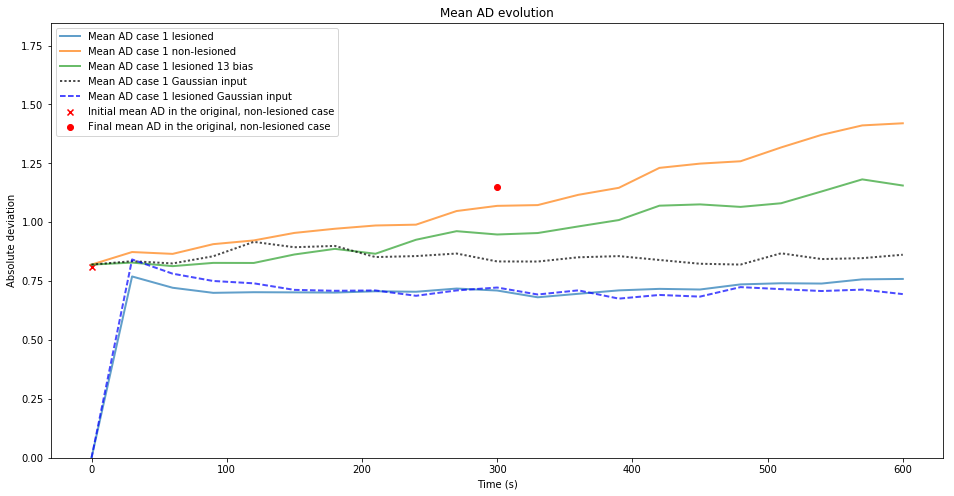

In [62]:
f, (ax) = plt.subplots(1, 1,figsize=(16,8), dpi=600)
conc2_lesioned =np.concatenate(([init_mean_AD_lesioned],all_mean_ads_lesioned))
conc2_lesioned_13_bias =np.concatenate(([init_mean_AD_lesioned_13_bias],all_mean_ads_lesioned_13_bias))
conc2_non_lesioned =np.concatenate(([init_mean_AD_non_lesioned],all_mean_ads_non_lesioned))
conc2_case_3 =np.concatenate(([init_mean_AD_case_3_lesioned_gaussian_input],all_mean_ads_case_3_lesioned_gaussian_input))
conc2_case_1_gaussian_input = np.concatenate(([init_mean_AD_case_1_gaussian_input],all_mean_ads_case_1_gaussian_input))
conc2_case_1_lesioned_gaussian_input = np.concatenate(([init_mean_AD_case_1_lesioned_gaussian_input],all_mean_ads_case_1_lesioned_gaussian_input))

ax.plot(np.arange(all_mean_ads_lesioned.size+1) * hardcoded_t_record, conc2_lesioned, label='Mean AD case 1 lesioned', alpha=.7, linewidth=2)
ax.plot(np.arange(all_mean_ads_non_lesioned.size+1) * hardcoded_t_record, conc2_non_lesioned, label='Mean AD case 1 non-lesioned', alpha=.7, linewidth=2)
ax.plot(np.arange(all_mean_ads_lesioned_13_bias.size+1) * hardcoded_t_record, conc2_lesioned_13_bias, label='Mean AD case 1 lesioned 13 bias', alpha=.7, linewidth=2)
# ax.plot(np.arange(all_mean_ads_case_3.size+1) * hardcoded_t_record, conc2_case_3, label='Mean AD case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
ax.plot(np.arange(all_mean_ads_case_1_gaussian_input.size+1) * hardcoded_t_record, conc2_case_1_gaussian_input, label='Mean AD case 1 Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
ax.plot(np.arange(all_mean_ads_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc2_case_1_lesioned_gaussian_input, label='Mean AD case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )




ax.set_title("Mean AD evolution")
ax.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax.set_ylim([0, 1.3 * np.max([conc2_lesioned, conc2_non_lesioned])])
ax.set_ylabel("Absolute deviation")

ax.scatter(0, 0.81, marker='x', c='r', label="Initial mean AD in the original, non-lesioned case")
ax.scatter(all_mean_ads_lesioned.size*hardcoded_t_record//2, 1.15, c='r', label="Final mean AD in the original, non-lesioned case")
# ax.set_ylim([0,1.3])
ax.legend(loc='best')
plt.savefig("mean_ad_evo_lesioned_vs_non_lesioned.png")

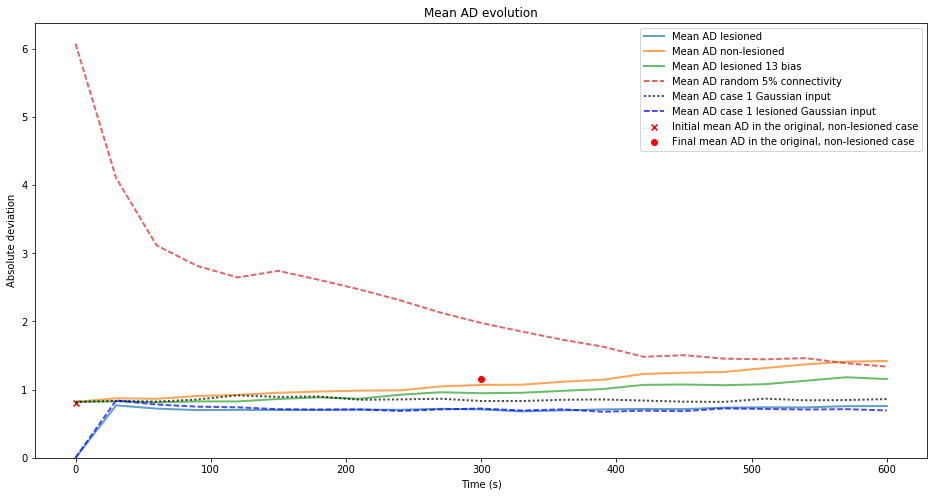

In [63]:
f, (ax) = plt.subplots(1, 1,figsize=(16,8), dpi=600)
conc2_lesioned =np.concatenate(([init_mean_AD_lesioned],all_mean_ads_lesioned))
conc2_lesioned_13_bias =np.concatenate(([init_mean_AD_lesioned_13_bias],all_mean_ads_lesioned_13_bias))
conc2_non_lesioned =np.concatenate(([init_mean_AD_non_lesioned],all_mean_ads_non_lesioned))
conc2_case_3 =np.concatenate(([init_mean_AD_case_3_lesioned_gaussian_input],all_mean_ads_case_3_lesioned_gaussian_input))
conc2_case_5_percent = np.concatenate(([init_mean_AD_5_percent],all_mean_ads_5_percent))
conc2_case_1_gaussian_input = np.concatenate(([init_mean_AD_case_1_gaussian_input],all_mean_ads_case_1_gaussian_input))
conc2_case_1_lesioned_gaussian_input = np.concatenate(([init_mean_AD_case_1_lesioned_gaussian_input],all_mean_ads_case_1_lesioned_gaussian_input))



ax.plot(np.arange(all_mean_ads_lesioned.size+1) * hardcoded_t_record, conc2_lesioned, label='Mean AD lesioned', alpha=.7, linewidth=2)
ax.plot(np.arange(all_mean_ads_non_lesioned.size+1) * hardcoded_t_record, conc2_non_lesioned, label='Mean AD non-lesioned', alpha=.7, linewidth=2)
ax.plot(np.arange(all_mean_ads_lesioned_13_bias.size+1) * hardcoded_t_record, conc2_lesioned_13_bias, label='Mean AD lesioned 13 bias', alpha=.7, linewidth=2)
# ax.plot(np.arange(all_mean_ads_case_3.size+1) * hardcoded_t_record, conc2_case_3, label='Mean AD case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
ax.plot(np.arange(all_mean_ads_5_percent.size+1) * hardcoded_t_record, conc2_case_5_percent, label='Mean AD random 5% connectivity', alpha=.7, linewidth=2, ls='--')
ax.plot(np.arange(all_mean_ads_case_1_gaussian_input.size+1) * hardcoded_t_record, conc2_case_1_gaussian_input, label='Mean AD case 1 Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
ax.plot(np.arange(all_mean_ads_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc2_case_1_lesioned_gaussian_input, label='Mean AD case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )




ax.set_title("Mean AD evolution")
ax.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax.set_ylim([0, 1.05 * np.max([conc2_lesioned, conc2_non_lesioned, conc2_case_5_percent])])
ax.set_ylabel("Absolute deviation")

ax.scatter(0, 0.81, marker='x', c='r', label="Initial mean AD in the original, non-lesioned case")
ax.scatter(all_mean_ads_lesioned.size*hardcoded_t_record//2, 1.15, c='r', label="Final mean AD in the original, non-lesioned case")
# ax.set_ylim([0,1.3])
ax.legend(loc='best')
plt.savefig("mean_ad_evo_lesioned_vs_non_lesioned2.png")